In [274]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [275]:
from keras import backend as K
print(K.backend())

tensorflow


CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [276]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

names = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 
         4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [277]:
# Create the model
inputs = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [278]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [279]:
batch_size = 256
epochs = 80

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

Epoch 1/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.2650 - loss: 1.9922 - val_accuracy: 0.4760 - val_loss: 1.4648
Epoch 2/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.4790 - loss: 1.4587 - val_accuracy: 0.5220 - val_loss: 1.3577
Epoch 3/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5228 - loss: 1.3534 - val_accuracy: 0.5632 - val_loss: 1.2622
Epoch 4/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5468 - loss: 1.2863 - val_accuracy: 0.5980 - val_loss: 1.2020
Epoch 5/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5697 - loss: 1.2325 - val_accuracy: 0.6112 - val_loss: 1.1493
Epoch 6/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5897 - loss: 1.1787 - val_accuracy: 0.6364 - val_loss: 1.0965
Epoch 7/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6081 - loss: 1.1319 - val_accuracy: 0.6432 - val_loss: 1.0597
Epoch 8/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6138 - loss: 1.1059 - val_accu

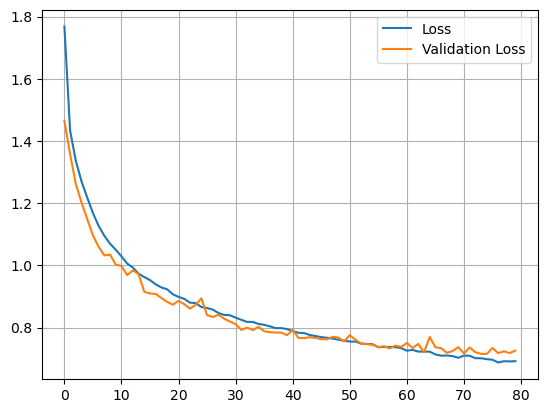

In [280]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [281]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7333942651748657
Test accuracy: 0.7526999711990356


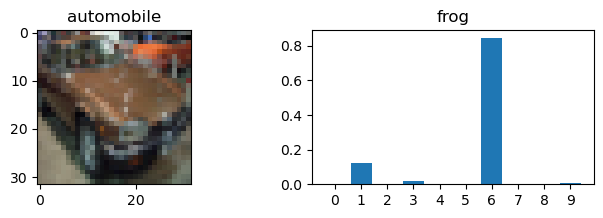

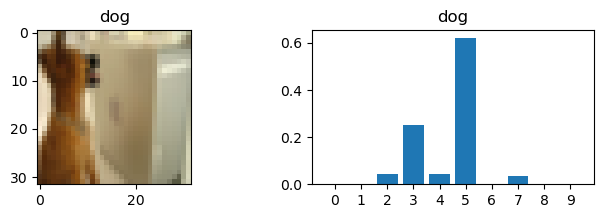

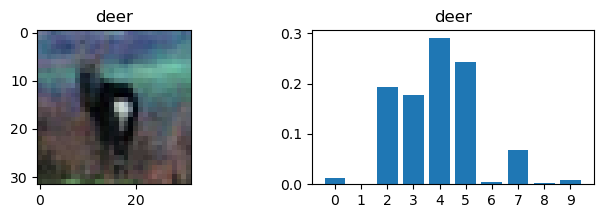

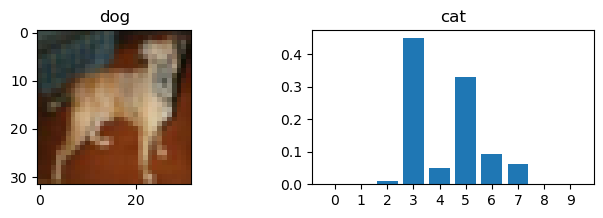

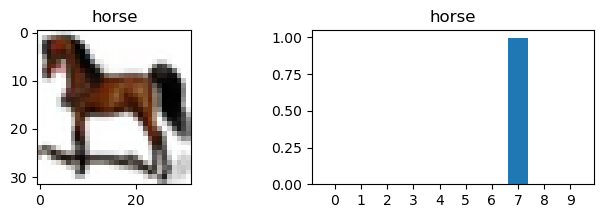

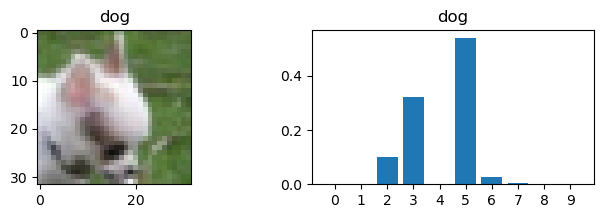

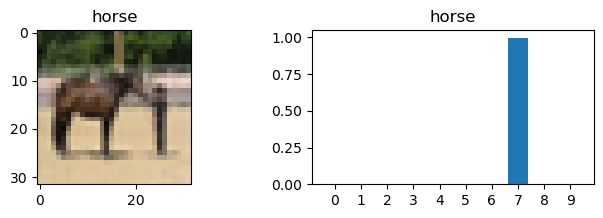

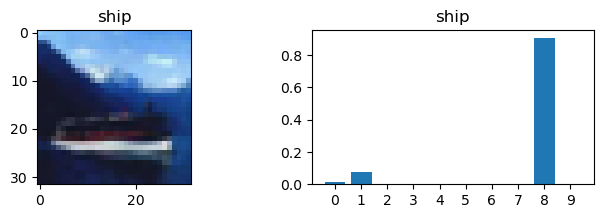

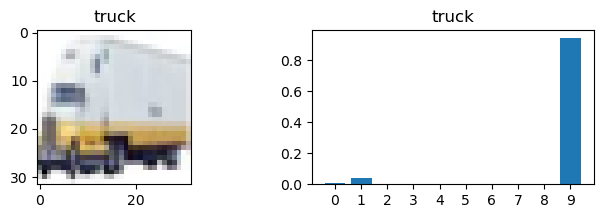

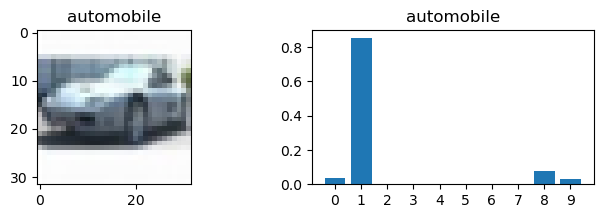

In [282]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    
    #plt.bar(ind, y[start+k].cpu().detach().numpy().flatten())   # Pytorch
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(predicted_class)
    
    # Tensorflow
    plt.xticks(range(10))